# 基于随机森林的个人年收入数据分类
## 一、实验简介
### （一）问题描述

个人年收入（Personal Income）指一个国家一年内个人得到的全部收入。个人年收入情况在某种程度上可以反应出一个国家的发展状况。

个人年收入的高低受很多因素的影响，比如年龄、受教育程度、职业等等，但是它们之间的关系及其复杂。如果能用机器学习方法高效的对个人年收入情况进行预测，那么将可以促使政府更好的了解民生情况，并制定精准的政策方针。

本实验利用机器学习中的随机森林算法实现个人年收入是否大于5万的预测。

### （二）问题需求
本实验中的数据集来自1994年美国的人口普查数据库中的部分数据。数据集有两个数据文件，分别是训练集数据文件和测试集数据文件。其中训练集数据文件包含了32561个样本数据，测试集数据文件包含了16282个样本数据，每个样本包含14个属性(个人信息)和一个标签(个人年收入是否大于50k），这些样本数据中有缺失值、各属性数据类型不一等问题。注意数据集本身没有列名，需添加列名。数据介绍表格如下：

![](data_file/info.png)
该表格介绍了15行信息，其中前面14行是样本的属性介绍，最后一行是样本的类别介绍，算法模型需要学习到这些属性是如何影响样本属于哪个类别（“>50K”,“<=50K”）的，从而实现算法模型通过新样本的属性数据对样本进行分类。

随机森林算法模型的训练和预测其样本数据必须是数值格式且无缺失值，所以本实验中对训练集和测试集样本数据的数据格式都转为了数值格式，并删除了有缺失值的样本数据，为了训练更好的模型还单独对训练集数据的属性'capital_loss'和属性'capital_gain'进行了对数变换。   
数据文件所在位置：训练集，"data_file/adult.data"；测试集，"data_file/adult.test" 。  

## 二、实验任务与要求
本实验主要任务是应用Sklearn库中的随机森林算法模块对个人年收入进行分类。将训练集和测试集数据进行数据处理达到算法模型的输入要求，用处理过的训练集数据对算法模型进行训练，最终实现算法模型对测试集数据进行分类并对分类结果进行准确率和F1指数评分，最后使用算法的不同参数值进行对比。实验具体任务如下：

1.数据加载：该数据集在加载时没有列名，需要添加列名（列名在上面的数据介绍表格中有提到）。

2.数据观察：观察数据集的整体情况及训练集和测试集之间的数据差别，需要对数据有大概的了解。

3.数据可视化：检测出数据缺失值情况，对'capital_loss'列和'capital_gain'列的数据分布通过柱状图进行可视化。

4.数据预处理：运用标签编码、缺失值删除的方式实现数据的清洗，使数据全部转化成数值格式数据；对'capital_loss'列和'capital_gain'列的数据做对数变换。

5.模型的训练、应用和评估：调用Sklearn库中的随机森林算法模块做分类任务，对比不同的参数（n_estimators=2，10，50，100，200，500）下模型的分类效果，并将准确率、F1指数和算法训练所耗时长用折线图可视化。

## 四、实验步骤

### （一）加载相关的包
1.导入numpy、pandas等包做数据处理。

2.导入matplotlib包做数据可视化。

3.导入RandomForestClassifier算法类用于数据训练并对数据进行分类。

4.从sklearn.preprocessing中导入LabelEncoder类对数据进行类别编码。

5.导入accuracy_score，f1_score函数对分类结果分布进行准确率和F1指数评估。

6.导入time类用于记录模型训练时间。

In [1]:
import pandas as pd   #数据处理包
import numpy as np    #矩阵运算包
from sklearn.ensemble import RandomForestClassifier  #随机森林分类模型
import matplotlib.pyplot as plt   #数据可视化包  
from sklearn.preprocessing import LabelEncoder  #数据类别编码
from sklearn.metrics import f1_score,accuracy_score   #评估数据分类结果
import time      #用于记录模型的训练时间

### （二）数据加载
调用pandas下的read_csv()函数来读取数据文件，函数所使用的参数解释：

    filepath_or_buffer：文件路径；

    names：在数据读取后给每一列数据加上列名，注意该列名个数必须跟读取数据的列数相等。

In [2]:
train_path = "data_file/adult.data"  
test_path = "data_file/adult.test"
columns = ['age','workclass','fnlgwt','education','education_num','marital_status','occupation','relationship'
           ,'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
#加载数据文件。注意加载数据文件时添加列名。
df_train_set = pd.read_csv(filepath_or_buffer=train_path, names=columns)   #读取训练集数据
df_test_set = pd.read_csv(filepath_or_buffer=test_path, names=columns)

### （三）数据观察

（1）调用head()函数观察训练集前15条数据和测试集前5条数据，了解训练集和测试集之间的数据差异以及初步观察是否有缺失值。

In [3]:
df_train_set.head(n = 15)

,age,workclass,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


从上表可以看到大部分都是字符型数据，在第15行中有一个缺失值'?'，可能数据里还有很多这种缺失值，后面将详细处理该问题。

In [4]:
df_test_set.head()

,age,workclass,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


此处需要注意，测试集中标签'income'列的数据与训练集中的标签列数据不同（多了一个'.')。

（2）下面调用Pandas库中的info()函数对训练集数据和测试集数据的整体信息进行观察，这样可以知道训练集和测试集每列数据类型的差异性。

In [5]:
df_train_set.info()#观察数据的整体信息 ，注意数据的大小、行列规模、数据类型等，便于后续数据处理。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlgwt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
age               16282 non-null object
workclass         16281 non-null object
fnlgwt            16281 non-null float64
education         16281 non-null object
education_num     16281 non-null float64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null float64
capital_loss      16281 non-null float64
hours_per_week    16281 non-null float64
native_country    16281 non-null object
income            16281 non-null object
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


可以看出训练集数据类型和测试集数据类型不是每列都一样的，测试集中数据类型为float64的列在训练集数据中全是int64；'age'列在训练集中的数据类型是int64，而在测试集中却是object。现在不确定测试集中数据类型为float64的列数据是否保留了小数，因此需要采取保守手段即将训练集中数据类型为int64的列转换数据类型为float64，将测试集中'age'列的数据类型转为int64。

（3）缺失值统计   
对训练集和测试集数据的缺失值情况进行统计，保证可视化列数据不报错以及对后面缺失值处理起引导作用。  
在观察数据时提到了缺失值是以'?'这种形式出现，此处将统计训练集和测试集每列数据中'?'的个数。

In [7]:
def deficiency(data):
    for i in data.columns:     #data.columns获取数据的所有列名
        print('{}：'.format(i),len(np.argwhere(data.loc[:,i]==' ?')))  #找出每列中等于'?'的数据个数
print("训练集每列缺失值个数：")
deficiency(df_train_set)
print("测试集每列缺失值个数：")
deficiency(df_test_set)

训练集每列缺失值个数：
age： 0
workclass： 1836
fnlgwt： 0
education： 0
education_num： 0
marital_status： 0
occupation： 1843
relationship： 0
race： 0
sex： 0
capital_gain： 0
capital_loss： 0
hours_per_week： 0
native_country： 583
income： 0
测试集每列缺失值个数：
age： 0
workclass： 963
fnlgwt： 0
education： 0
education_num： 0
marital_status： 0
occupation： 966
relationship： 0
race： 0
sex： 0
capital_gain： 0
capital_loss： 0
hours_per_week： 0
native_country： 274
income： 0


E:\profession_install\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
E:\profession_install\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


可以看到数据集中'capital_gain'列和'capital_loss'列没有缺失值，所以下面对这两列数据分布情况做可视化时无需处理；   
从缺失值数量来看，缺失值样本个数相对于样本总数还是很小的，所以后面可以删除这些样本数据。

### （四）数据可视化     
将数据可视化可以了解数据分布情况，判断数据分布是否异常。  
对训练集中'capital_gain'列和'capital_loss'列的数据分布情况做直方图可视化，这样可以判断数据分布是否特别离散。在机器学习中，如果数据分布特别不均衡将会影响到算法模型的训练效果。   
首先调用subplot()函数画子图，将两张图画到一幅图像上，再调用hist()函数对每段数值的数量进行统计并用柱状图的形式画出来，由于数据值为0的个数远远多其他数据值的个数，这将会导致其他数据值在图上可视化的效果不明显，所以需要对y轴限制最大值为3000。

figure(figsize=(20, 6))函数所使用的参数解释：

    figsize:图像的长宽设置。
hist(x = df_train_set.capital_gain, bins=40,facecolor="blue", edgecolor="black", alpha=0.7)函数所使用的参数解释：
    
    x:传入要统计的数据；
    bins：将传入的数据分段的数量；
    facecolor：填充柱状图的颜色；
    edgecolor：对柱状图的每部分外框设置颜色；
    alpha: 柱状图的透明度。

xlabe(xlabel = 'capital_gain',fontsize =13)函数和ylabel(ylabel = 'number',fontsize =13)函数分别为x轴和y轴设置名称，所使用的参数解释:

    xlabel、ylabel：名称；

    fontsize：字体大小。

Text(0, 0.5, 'number')

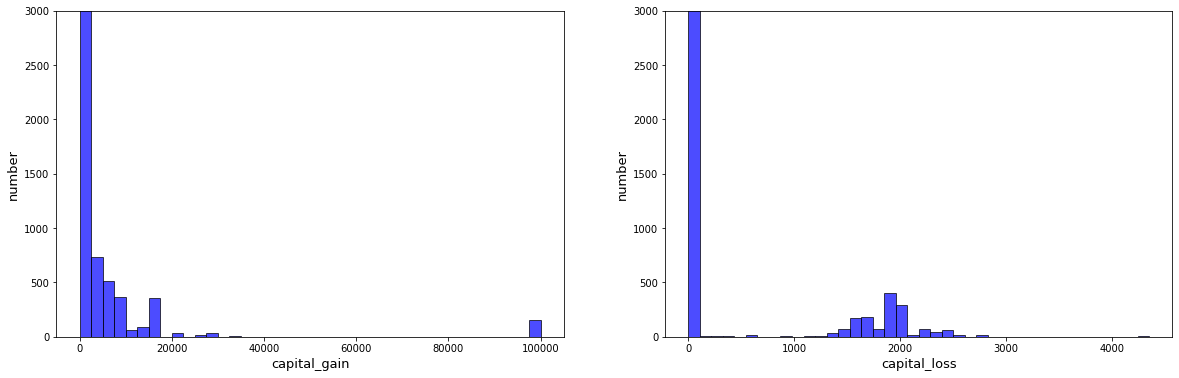

In [8]:
plt.figure(figsize=(20, 6))#定义图的长度和宽度
plt.subplot(121)  #设置子图位置，121即可画1行2列的图，该子图是第一张图即位置为1行1列
plt.hist(x = df_train_set.capital_gain, bins=40,facecolor="blue", edgecolor="black", alpha=0.7) #画分布直方图
plt.ylim(top = 3000)#为y轴设置最大值
plt.xlabel(xlabel = 'capital_gain',fontsize =13)   #设置x轴名称
plt.ylabel(ylabel = 'number',fontsize =13)   #设置y轴名称

plt.subplot(122)
plt.hist(x = df_train_set.capital_loss, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.ylim(top = 3000)
plt.xlabel(xlabel = 'capital_loss',fontsize =13 )
plt.ylabel(ylabel = 'number',fontsize=13)

可以看到训练集中列'capital_gain'和列'capital_loss'的数据分布非常不均衡，这将不利于算法模型的学习，后续需要对这两列数据的分布情况进行调整。

### （五）数据处理
数据处理是机器学习中使数据符合算法模型的输入要求以及提高算法模型的预测性能的主要阶段。此阶段是为了规范数据、提升数据质量，从问题需求可以知道本实验的数据比较复杂且不符算法的输入要求。  
通过上面观察数据和数据可视化阶段知道：数据集中有缺失值'?'和无意义的列数据；训练集和测试集部分列的数据类型不同；列'capital_gain'和列'capital_loss'的数据分布特别离散；数据类型不符算法模型的输入要求。   
那么本阶段的主要工作如下：

（1）删除数据：删除缺失值所在的行及无意义的列。

（2）类型转换：对数据集的列数据进行类型转换。

（3）数据分布变换：对列'capital_gain'和列'capital_loss'中的数据分别求对数变换。

（4）数据编码：对数据类型为object数据进行类别编码。

（1）删除数据   
在数据的介绍中可以了解到列‘fnlgwt'的数据是无用的，还了解到列'education'和列'education_num'表达意思相同，所以只需保留一列。此处调用Pandas库中的drop(labels=['fnlgwt'], axis=1, inplace=True)函数删除列数据。

drop()函数所使用的参数解释：

    labels：是需要删除的行或列的名字，一般用列表形式；
    axis：选择删除的是行还是列，0是行，1是列；
    inplace：是否就地操作，就是对调用该函数对象进行操作，返回值为None。

In [9]:
df_train_set.drop(labels=['fnlgwt'], axis=1, inplace=True)   #对训练集删除该列数据
df_test_set.drop(labels='fnlgwt', axis=1, inplace=True)           #对测试集删除该列数据

df_train_set.drop(labels=["education"], axis=1, inplace=True)
df_test_set.drop(labels=["education"], axis=1, inplace=True)

根据前面可视化可知，需删除缺失值所在的行。首先调用了Pandas库中的replace(to_replace=' ?', value= np.nan)函数找到缺失值并用np.nan替换掉，再调用dropna()函数统一对np.nan数据所在的行进行删除。  
replace()函数所使用的参数解释：

    to_replace：需要替换的值；
    value：替换后的值。

In [10]:
df_train_set = df_train_set.replace(to_replace=' ?', value= np.nan).dropna()  #删除训练集数据的缺失值所在的行
df_test_set = df_test_set.replace(to_replace=' ?',  value=np.nan).dropna()  #删除测试集数据的缺失值所在的行

（2）类型转换  
前面观察数据中所提到的训练集数据类型为int64的列需转为float64,测试集列'age'转换数据类型为int64，需要调用astype()函数进行转换。

In [11]:
change_list = ['education_num','capital_gain','capital_loss','hours_per_week']
df_train_set[change_list] = df_train_set[change_list].astype(np.float64)    #转int64为float64
df_test_set.age = df_test_set.age.astype(np.int64)   #对测试集列'age'数据转数据类型为int64

（3）数据分布变换  
在可视化时提到了训练集中列'capital_loss'和列'capital_gain'的数据分布太离散，为了缓和这种离散分布将进行对数变换，对这两列数据通过apply()函数取出每一列，再通过lambda匿名函数遍历所取出列的每一个数值并求对数，该处加1是因为数据中有为0的值，而1相对于数据中的值来说是非常小的，基本不会对模型的训练有影响。   
lambda匿名函数是无需定义函数名的函数，它允许快速定义单行函数，冒号前面就是该匿名函数的参数。

E:\profession_install\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
E:\profession_install\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


(0.0, 3000)

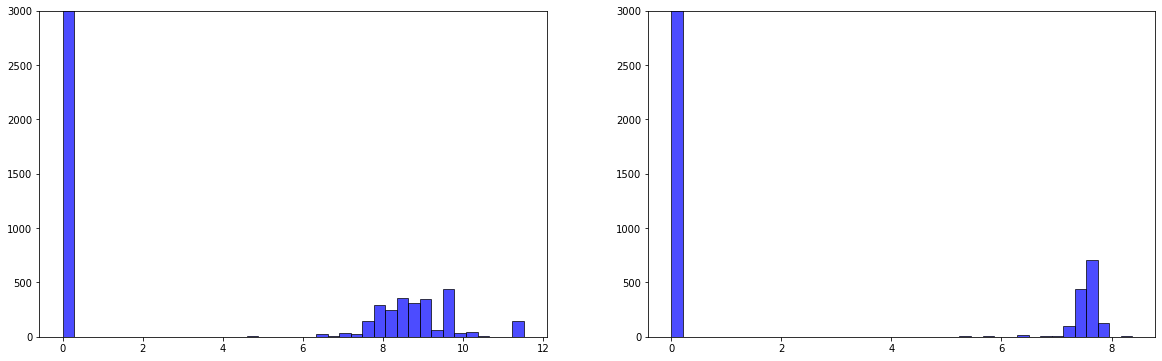

In [12]:
skewed = ['capital_loss','capital_gain']
df_train_set[skewed] = df_train_set[skewed].apply(lambda x: np.log(x + 1))   #对列'capital_loss'和列'capital_gain'求对数
plt.figure(figsize=(20, 6))    #定义图的长度和宽度
plt.subplot(121)       #设置子图位置，121即可画1行2列的图，该子图是第一张图即位置为1行1列
plt.hist(df_train_set.capital_gain, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)  #画分布直方图
plt.ylim(top = 3000)   #为y轴设置最大值

plt.subplot(122)
plt.hist(df_train_set.capital_loss, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.ylim(top = 3000)

（4）数据编码  
为了统一处理训练集和测试集调用concat()函数将训练集数据和测试集数据按行合并起来,在合并之前需要对训练集和测试集中的列'income'的数据值进行统一，将对测试集中列'income'的数据进行了改变，之后遍历合并后的数据的每一列，对数据类型为object的列进行类别编码。

In [13]:
df_test_set.income = df_test_set.income.replace([' >50K.',' <=50K.'], [' >50K',' <=50K'])    #将训练集的列'income'的数据与训练集统一
combined_set = pd.concat([df_train_set, df_test_set], axis=0)       #按行连接训练集和测试集 
for feature in combined_set.columns:      #遍历数据集的每一列
    if combined_set[feature].dtype == 'object':    #如果列数据类型是否为object类型
        lab = LabelEncoder()              #创建编码类对象
        combined_set[feature] = lab.fit_transform(combined_set[feature])   #对数据类型为object的列数据进行类编码
#将训练集和测试集分开
df_train_set = combined_set[:df_train_set.shape[0]]    
df_test_set = combined_set[df_train_set.shape[0]:]
#将数据集标签和特征分开
cols = list(df_train_set.columns)
cols.remove("income")
x_train, y_train = df_train_set[cols].values, df_train_set["income"].values
#测试集的输入和输出结果分开，用来校验模型的准确率
x_test, y_test = df_test_set[cols].values, df_test_set["income"].values

### （六）模型的训练、应用和评估
决策树是一个非常典型树结构算法，其每个非叶节点表示一个特征属性的测试，每个分支代表这个特征属性在某个值域上的输出，每个叶节点存放一个类别。当一个样本数据输入到决策树中，通过非叶节点的对样本的特征的进行测试，最终可以到达该树的叶节点，那么该叶节点所存放的类别就是对该样本数据的预测结果。   
随机森林算法采用多个决策树算法模型对样本数据进行分类，之后将每个决策树算法模型的分类结果输入到多数投票机制中对样本数据进行最终分类，其中随机的意思是在决策树特征属性选择时随机选择一部分特征属性。该算法既可以做分类任务也可以做回归任务，所以在适用场景上没有什么特别要求，主要是在算法选择上，由于它是一个集成学习算法，所以需要选择基学习器（算法)，但所选择的基学习器需要是弱学习器（学习器预测的准确率略高于50%）。

随机森林算法应用到人口普查收入数据中来做分类任务，并使用该算法模型不同的n_estimators参数值进行对比，其主要工作如下：

1.为了方便对不同参数（n_estimators）值的算法模型所预测的结果进行评估，需要编写一个包含模型调用、训练和预测功能的函数model_classify(number ,x_train ,y_train ,x_test ,y_test,f1_list,accu_list,time_list),实现对不同n_estimators参数值的算法模型进行的分类任务，并对分类结果进行准确率、F1指标评估，以及记录训练时长。该函数所使用的参数解释：

    number：模型中决策树的个数；
    x_train ：训练集特征数据；
    y_train：训练集标签数据；
    x_test：测试集特征数据；
    y_test：测试集标签数据；
    f1_list：存储模型预测结果的F1指标值的列表；
    accu_list：存储模型预测结果的准确率的列表；
    time_list：存储模型训练所耗时长。
调用RandomForestRegressor(n_estimators=number, criterion='gini')算法类，创建随机森林算法类对象。该类所使用的参数解释：

    n_estimators：模型中决策树的个数；
    criterion：决策树的划分条件。决策树的划分条件有很多种，但是主流的有三种，信息增益、信息增益率、基尼不纯度（gini)。
调用f1_score()、accuracy_score()函数对模型的预测结果进行F1指数和准确率评分。  
准确率：对给到的要评估数据集的样本进行预测，求预测正确的样本数占所预测的总样本数的比例。该指标评估模型的预测结果更容易理解，更具有分析力。   
精确率(P)：求预测的所有正例样本（更能引起关注的一类）中预测正确的样本所占比例。其意义为自己所认可的东西中有多少是大众所认可的。   
召回率(R)：求数据集中所有正例样本被预测正确的个数占所有正例样本的比例，衡量模型对正例的识别能力。   
F1指标：该指标是精确率和召回率加权调和平均，其公式为$F = \frac{2PR}{P+R}$。指标越高模型预测结果越好，要想提高指标值，精确率和召回率两个值需相差不大而且都接近于1。从这点来说模型预测结果用F1指标来评估更有说服力。

2.为了更直观的看出对于不同参数（n_estimators）值的模型所预测结果的评估指标以及模型的训练时间，需要编写一个函数draw_result(f1_list,accu_list,time_list,n_estimators)来可视化不同参数值的算法模型分类结果的准确率、F1指标以及模型的训练时长。其函数所使用的参数解释：
    
    f1_list：模型预测结果的F1指标值的列表；
    accu_list：模型预测结果的准确率的列表；
    time_list：模型训练所耗时长；
    n_estimators：模型中决策树的个数。

In [14]:
def model_classify(number ,x_train ,y_train ,x_test ,y_test,f1_list,accu_list,time_list):
    start_time = time.time()
    treeClassifier = RandomForestClassifier(n_estimators=number, criterion='gini')    #创建随机森林算法类对象
    treeClassifier.fit(x_train, y_train)     # 训练模型
    time_list.append(round(time.time()-start_time,3))   #将训练时间添加至time_list列表中
    y_pred = treeClassifier.predict(x_test)       # 用测试集做预测
    f1_list.append(round(f1_score(y_test, y_pred),3))  #将模型预测结果的F1指标值添加至f1_list列表中
    accu_list.append(round(accuracy_score(y_test, y_pred),3))   #将模型预测结果的准确率添加至accu_list列表中

调用Matplotlib库中的plot()函数进行绘图，其参数解释如下：

    第一个参数：图像中的x坐标；
    第二个参数：图像中的y坐标；
    label：图像中线的标签；
    linewidth：图像中线的粗细程度；
    color：图像中线的颜色，其值一般是对应颜色英文首字母，比如'g'代表绿色(green)；
    marker：折点标记符号，'.'是用实心园标记；
    markerfacecolor：标记符号的颜色；
    markersize：标记符号的大小。
调用text()对每点标上数据，其参数解释如下：
    
    x：图像中的x坐标；
    y：图像中的y坐标；
    s：标记点的数据；
    ha：标数据位置，其中'center'是在点的中部标数据；
    fontsize：数据的文字大小。
    

In [15]:
def draw_result(f1_list,accu_list,time_list,n_estimators):  
    plt.figure(figsize=(18, 6))   #设置图像大小（包括两张子图）
    #画第一张子图，可视化不同n_estimators参数值的模型预测结果的准确率、F1指数评分。121表示子图以1行2列的形式显示，该子图是第1张。
    plt.subplot(121)
    plt.title("Model_score")  # 标题
    plt.plot(n_estimators, f1_list, label='F1_score', linewidth=1, color='r', marker='.',
             markerfacecolor='blue', markersize=10)   #在图上画出数据的折线线
    # 设置数字标签
    for a, b in zip(n_estimators, f1_list):   #这里对n_estimators, f1_list这两个列表进行打包，同时迭代
        plt.text(x=a, y=b, s=b, ha='center', fontsize=10)   
        
    plt.plot(n_estimators, accu_list, label='accuracy_score', linewidth=1, color='g', marker='.',
             markerfacecolor='yellow', markersize=10)
    # 设置数字标签
    for a, b in zip(n_estimators, accu_list):
        plt.text(x=a, y=b, s=b, ha='center', fontsize=10) 
    plt.xlabel('n_estimators')  # 横坐标描述
    plt.ylabel('score')  # 纵坐标描述
    plt.legend()        #显示线标记
    
    #画第二张子图，不同n_estimators参数值的模型训练时间
    plt.subplot(122)    
    plt.title("train_time")  #标题
    plt.plot(n_estimators, time_list, label='time', linewidth=1, color='r', marker='.',
             markerfacecolor='blue', markersize=10)
    # 设置数字标签
    for a, b in zip(n_estimators, time_list):
        plt.text(x=a, y=b, s=b, ha='center', fontsize=10) 
    plt.xlabel('n_estimators')  # 横坐标描述
    plt.ylabel('time(s)')  # 纵坐标描述
    plt.legend()
    plt.show()

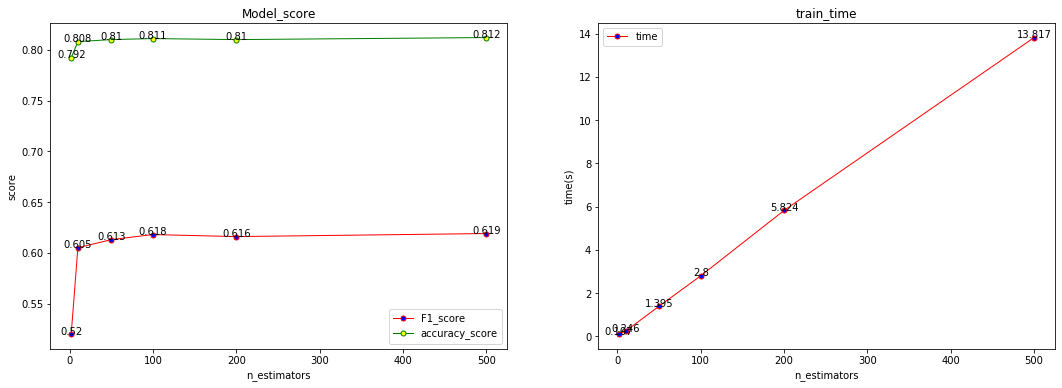

In [16]:
f1_list=[]   #用于存储模型预测结果的F1指标值的列表
accu_list=[]  #用于存储模型预测结果的准确率的列表
time_list = []  #用于存储模型训练所耗时长
n_estimators = [2,10,50,100,200,500]   #设置算法模型不同的参数值n_estimators
for num in n_estimators: 
    model_classify(num ,x_train ,y_train ,x_test ,y_test,f1_list ,accu_list ,time_list)   #调用模型分类函数
draw_result(f1_list,accu_list,time_list,n_estimators)   #调用可视化函数

## 五、结果分析

本次实验使用的是人口普查数据中的部分数据实现收入分类任务，通过调用Sklearn库中的随机森林算法模块对其进行学习并预测。由于数据中存在缺失值、冗余列、数据分布不均衡等问题，在实验过程中使用了缺失值删除、数据的类型转换、对数变换和数据类编码操作解决了上述问题。之后使用不同决策树数量的随机森林算法模型分别对训练集数据进行学习，再用这些模型对测试集数据进行分类，最后对分类结果进行多指标评估。  

从预测结果可视化图可以看出，随着参数n_estimators的不断增大，随机森林算法模型预测结果的评估指标也不断提升，但提升的效果越来越不明显，在n_estimators=500时模型预测结果的评估指标反而要低，这预示着模型过拟合了。综合准确率、F1指标和模型训练耗时三个因素进行考虑，在本实验参数n_estimators的取值中，取值为10时模型的预测性能最好。由于本实验的特征数据比较少，经数据处理后仅仅是12个，数据比较简单，所以参数n_estimators取值比较小时预测性能较好，过多将会产生过拟合现象。为了更精确的选择参数n_estimators的值可以用Sklearn库中的GridSearchCV参数优化器。现实生活中的数据会非常复杂(数据特征属性多)、数据的类型不一（既有连续型数据，也有离散型数据）、预测任务多样化（回归、分类）等等，因为该算法对于这些数据都能很好的处理，在实际应用中该算法相对于其他非集成学习算法有很大的优势。

In [2]:
from sklearn.ensemble import RandomForestClassifier#导入随机森林算法类
from sklearn.datasets import load_iris#导入鸢尾花数据集
from sklearn.model_selection import train_test_split#导入训练集和测试集分割函数


In [3]:
data = load_iris()#加载数据集

In [7]:
X = data.data
y = data.target

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)#分割训练集和测试集

In [10]:
model  = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)#创建随机森林算法对象

In [11]:
model.fit(x_train, y_train)#训练模型得到模型参数W和b

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
model.score(x_test, y_test)#计算测试集的准确率

1.0